# Task:

1.Data Exploration and Preprocessing
2. Model Selection and Training

# 1.Import Necessary Libary

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
#read csv file from directory
df = pd.read_csv("Resume.csv") 

In [36]:
#show first 5 row of the dataset
df.head(5) 

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


1.Data Exploration and Preprocessing

In [37]:
#information regarding dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [38]:
#dataset description 
df.describe() 

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


In [39]:
#Check for unique class name
df['Category'].unique() 

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [40]:
#Value count of Category Column
df['Category'].value_counts() 

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

In [41]:
#Check for Missing Value
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

<Axes: xlabel='count', ylabel='Category'>

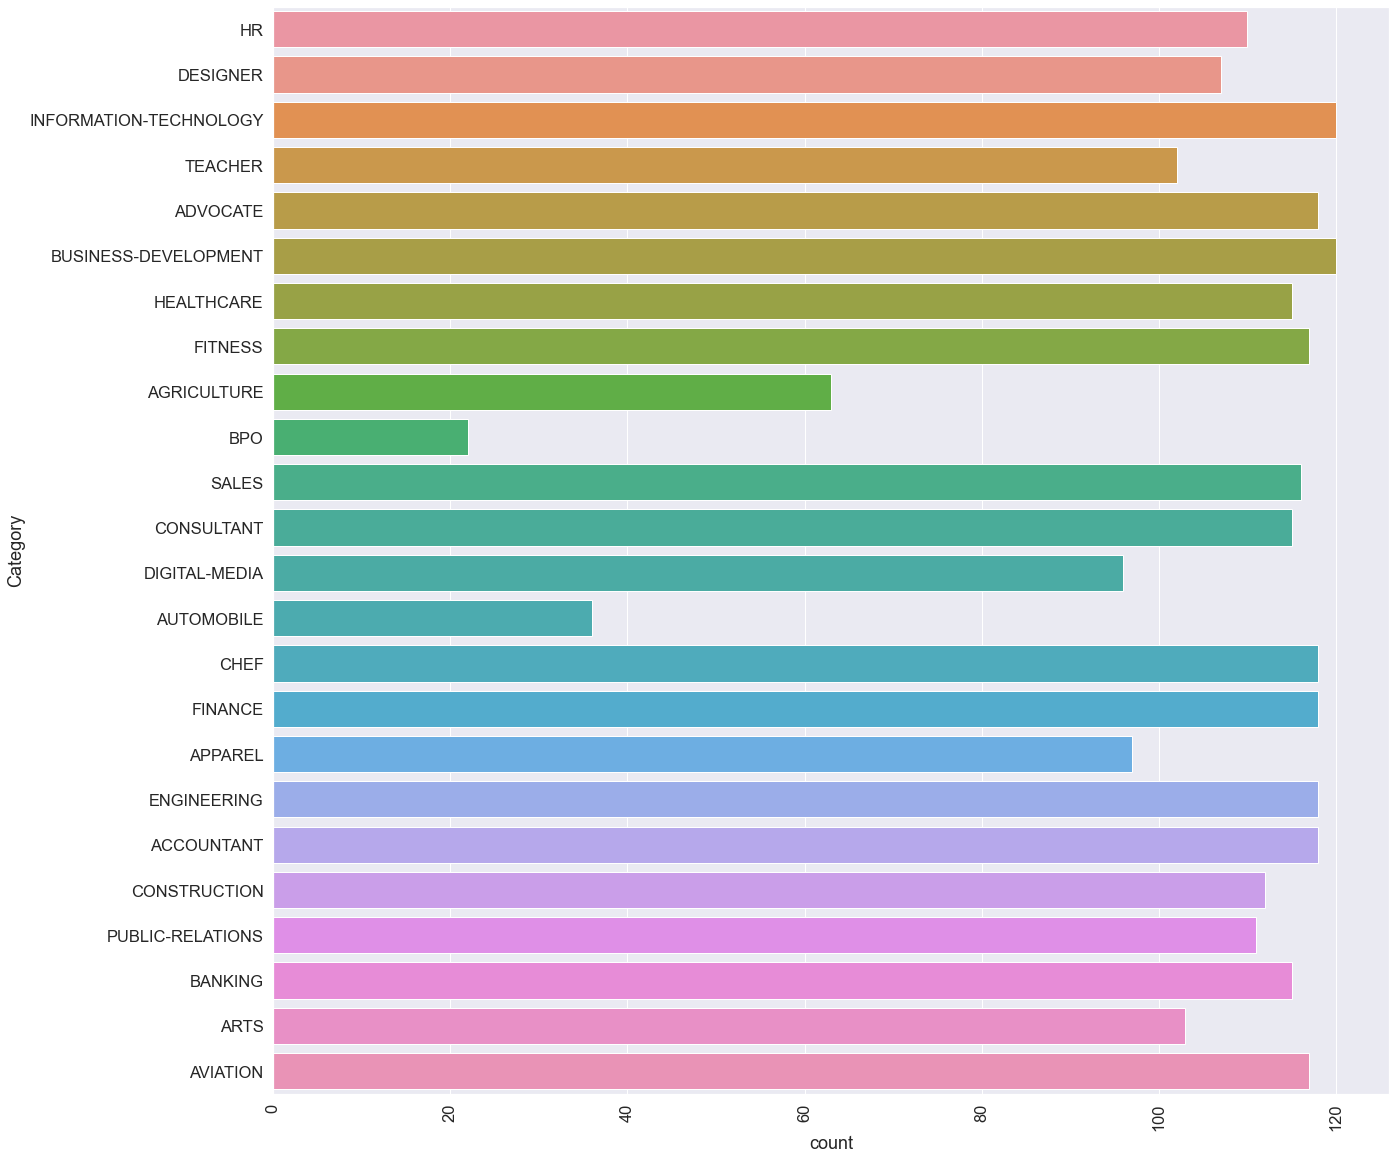

In [42]:
#Let's Visualize the Countplot
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

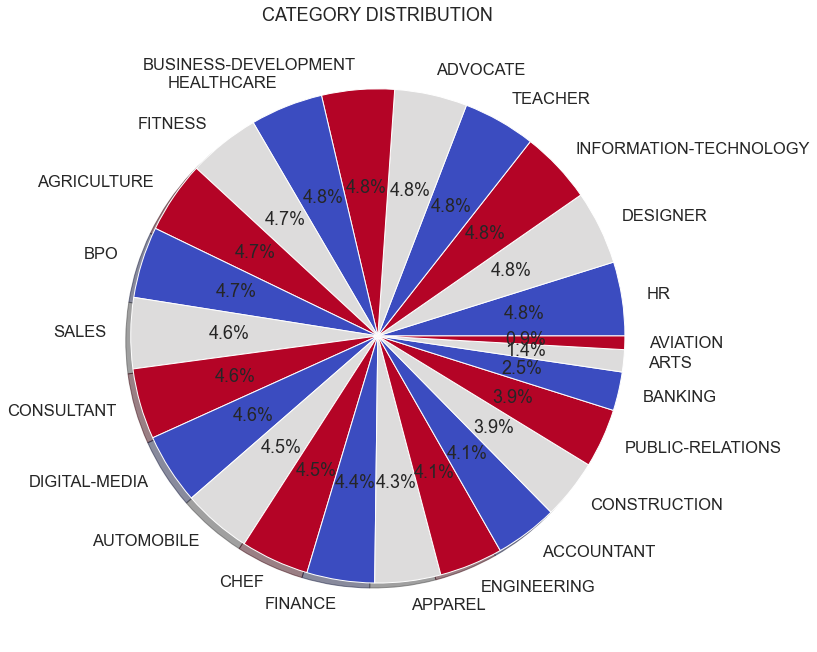

In [43]:
#Category Distribution with percentage value
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()

plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

-> Data Cleaning

In [44]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [45]:
df['cleaned_resume'] = ''

In [46]:
df.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,


In [47]:
df['cleaned_resume'] = df.Resume_str.apply(lambda x: cleanResume(x))
df['cleaned_resume'][31]

' HR GENERALIST Professional Profile Responsible administrative support professional with extensive experience in Project Management and Finance environments Organized and detail oriented with strengths in project management and inventory control Certified Professional in Human Resources PHR with additional state certification from US Armed Forces offering a 9 year HR career distinguished by commended performance and proven results Extensive background in HR generalist affairs including experience in employee recruitment and retention staff development mediation conflict resolution benefits and compensation HR records management HR policies development and legal compliance Demonstrated su ess in negotiating win win compromises developing teambuilding programs and writing personnel manuals corporate policies job descriptions and management reports Qualifications Staff Recruitment Retention Employee Relations Alternative Dispute Resolution ADR Benefits Administration HR Program Project M

In [48]:
df.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,HR SPECIALIST US HR OPERATIONS Summary Versat...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR DIRECTOR Summary Over 20 years experience ...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR SPECIALIST Summary Dedicated Driven and Dy...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR MANAGER Skill Highlights HR SKILLS HR Depa...


In [49]:
df['cleaned_resume']

0        HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...
1        HR SPECIALIST US HR OPERATIONS Summary Versat...
2        HR DIRECTOR Summary Over 20 years experience ...
3        HR SPECIALIST Summary Dedicated Driven and Dy...
4        HR MANAGER Skill Highlights HR SKILLS HR Depa...
                              ...                        
2479     RANK SGT E 5 NON COMMISSIONED OFFICER IN CHAR...
2480     GOVERNMENT RELATIONS COMMUNICATIONS AND ORGAN...
2481     GEEK SQUAD AGENT Professional Profile IT supp...
2482     PROGRAM DIRECTOR OFFICE MANAGER Summary Highl...
2483     STOREKEEPER II Professional Summary The purpo...
Name: cleaned_resume, Length: 2484, dtype: object

In [51]:
#Remove Stopword, Data Encoding, Wordcloud, Word Token
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_str'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('HR', 1045), ('State', 959), ('City', 927), ('Company', 749), ('Name', 715), ('employee', 627), ('management', 602), ('employees', 500), ('Management', 469), ('new', 457), ('training', 454), ('Human', 451), ('design', 346), ('A', 338), ('company', 321), ('including', 320), ('development', 303), ('policies', 295), ('benefits', 288), ('process', 288), ('Resources', 269), ('skills', 254), ('procedures', 252), ('team', 251), ('staff', 250), ('issues', 245), ('business', 241), ('Skills', 239), ('payroll', 234), ('programs', 232), ('job', 229), ('performance', 223), ('customer', 221), ('I', 220), ('2014', 218), ('reports', 216), ('Business', 214), ('01', 211), ('Employee', 210), ('support', 207), ('recruitment', 205), ('data', 201), ('information', 195), ('personnel', 194), ('work', 192), ('University', 187), ('Manager', 186), ('Education', 186), ('system', 184), ('Experience', 183)]


# 2.Model Selection and Training

In [52]:
#Convert Categorical Data to Numerical Data 
target = ['Category']
le = LabelEncoder()
for i in target:
    df[i] = le.fit_transform(df[i])

In [53]:
#Dependent & Independent Feature
X = df['cleaned_resume'].values
y = df['Category'].values

In [54]:
#TFIDF Vectorizer to convert text into Vector
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(X)
WordFeatures = word_vectorizer.transform(X)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,y,random_state=0, test_size=0.2)
print("Shape->")
print(X_train.shape)
print(X_test.shape)

Shape->
(1987, 1500)
(497, 1500)


->Model Selection & Model Training

->DecisionTree Classifier

In [56]:
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(X_train, y_train)
predictiondt = clf.predict(X_test)
print('Accuracy of DecisionTree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of DecisionTree Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, predictiondt)))

Accuracy of DecisionTree Classifier on training set: 1.00
Accuracy of DecisionTree Classifier on test set: 0.46

 Classification report for classifier OneVsRestClassifier(estimator=DecisionTreeClassifier()):
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.86      0.60      0.71        20
           2       0.17      0.06      0.09        16
           3       0.25      0.12      0.16        17
           4       0.62      0.20      0.30        25
           5       0.00      0.00      0.00         6
           6       0.88      0.63      0.73        35
           7       0.71      0.52      0.60        23
           8       1.00      0.12      0.22         8
           9       0.55      0.39      0.46        28
          10       1.00      0.78      0.88        23
          11       0.88      0.71      0.79        21
          12       0.44      0.20      0.28        20
          13       1.00      0.50  

-> MultinomialNB Classifier

In [57]:
MNB = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = MNB.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(MNB.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(MNB.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (MNB, metrics.classification_report(y_test, prediction)))

Accuracy of MultinomialNB Classifier on training set: 0.65
Accuracy of MultinomialNB Classifier on test set: 0.53

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       0.41      1.00      0.58        19
           1       0.38      0.50      0.43        20
           2       0.00      0.00      0.00        16
           3       0.75      0.18      0.29        17
           4       0.50      0.04      0.07        25
           5       0.00      0.00      0.00         6
           6       0.89      0.69      0.77        35
           7       0.70      0.61      0.65        23
           8       0.00      0.00      0.00         8
           9       0.46      0.61      0.52        28
          10       0.67      0.78      0.72        23
          11       0.62      0.71      0.67        21
          12       0.00      0.00      0.00        20
          13       1.00      0.56      0.7

d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-> RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
predictionrf = clf.predict(X_test)
print('Accuracy of RandomForest Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of RandomForest Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, predictionrf)))

Accuracy of RandomForest Classifier on training set: 1.00
Accuracy of RandomForest Classifier on test set: 0.46

 Classification report for classifier OneVsRestClassifier(estimator=DecisionTreeClassifier()):
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.86      0.60      0.71        20
           2       0.17      0.06      0.09        16
           3       0.25      0.12      0.16        17
           4       0.62      0.20      0.30        25
           5       0.00      0.00      0.00         6
           6       0.88      0.63      0.73        35
           7       0.71      0.52      0.60        23
           8       1.00      0.12      0.22         8
           9       0.55      0.39      0.46        28
          10       1.00      0.78      0.88        23
          11       0.88      0.71      0.79        21
          12       0.44      0.20      0.28        20
          13       1.00      0.50  

In [59]:
import pickle
pickle.dump(word_vectorizer,open('tfidf.pkl','wb'))
pickle.dump(MNB, open('clf.pkl', 'wb'))

->Prediction System

In [91]:
#Unseen Data

myresume = """PROFESSIONAL EXPERIENCE Python Machine Learning Tensorflow Opencv Scikit-Learn 
C++ Git & Github Data Struture & Algo 
Flutter Arduino & Raspberry PI Flask
Deep Learning SQL Natural language processing YOUTUBE CHANNEL ACHIEVEMENTS 
MISO DHAR CHANDO
SOFTWARE ENGINEER
EDUCATION KEY SKILLS B.S.C in Computer Science & Engineering University Of Science & Technology, Chittagong
-Graduated With CGPA - 3.58 Out Of 4.00 
Prototype hardware and software solutions for tracking, detection and modeling. 
Building detection & classification models using Python, Tensorflow , Keras & Opencv Apply machine learning to computer vision problems. 
3D Custom Image Segmentation & Detection using Deep learning. Designed machine learning algorithm that evaluated to 87%. Machine Learning , 
Deep Learning & Computer Vision Engineer (Remote) Bitflow Inc. (Seoul ,South Korea) 
October 2021 to Present +8801572227937 
chandostudent@gmail.com Chittagong, 
Bangladesh LinkedIn Github FEB ' 19 - DEC ' 22 -Chittagong, Bangladesh 
PROJECTS Face Recognition Based Door Lock & Attendance System Using Python, 
Flutter & Arduino ( Source Code ) 
Custom Hand Sign Detection & Recognition Using Yolov5 (Source Code) 
Fake News Detection Using Deep Learning & NLP (Source Code) 
Automate Game Using Hand Gesture & Python (Source Code) 
Image Search Engine Using Deep Learning ( Source Code ) 
KNOWLEDGE DOCTOR - 17K+ Subscriber -> 
Making programming tutorials to tech students how to code efficiently. 
To learn Python , Machine Learning, Deep Learning , 
Computer Vision Project , Data Structure, Flutter and other technical topics 
( Link) 
Workshop on Python Machine Learning - Recognition & Conducting Workshop - 16 November 2022 
Project Exhibition Spring USTC 2022 - 
Champion - 14 March 2022 Bangladesh Academy of Science-First Security Islami Bank Science Olympiad - 
2nd rank- 12 January 2018 Leetcode
"""

In [92]:
df['Category'].unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

In [93]:

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = word_vectorizer.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = MNB.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    0: "ACCOUNTANT",
1: "ADVOCATE",
2: "AGRICULTURE",
3: "APPAREL",
4: "ARTS",
5: "AUTOMOBILE",
6: "AVIATION",
7: "BANKING",
8: "BPO",
9: "BUSINESS-DEVELOPMENT",
10: "CHEF",
11: "CONSTRUCTION",
12: "CONSULTANT",
13: "DESIGNER",
14: "DIGITAL-MEDIA",
15: "ENGINEERING",
16: "FINANCE",
17: "FITNESS",
18: "HEALTHCARE",
19: "HR",
20: "INFORMATION-TECHNOLOGY",
21: "PUBLIC-RELATIONS",
22: "SALES",
23: "TEACHER",

}
                      

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)


Predicted Category: ENGINEERING
15


->Evaulation Matrix

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score, f1_score
# Generate confusion matrix for the predictions
conf_matrix = confusion_matrix(y_test, prediction)
conf_matrix

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 10,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  1,  1,  5,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  3,
         0,  0,  0,  0,  1,  3,  2,  3],
       [ 0,  0,  0,  3,  0,  0,  0,  1,  0,  2,  0,  1,  0,  0,  1,  0,
         1,  0,  0,  1,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,
         0,  1,  1,  0,  3,  3,  4,  8],
       [ 0,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 24,  0,  0,  1,  0,  0,  1,  0,  0,  4,
         2,  0,  0,  0,  0,  0,  1,  0],
       [ 2,  2,  0,  0,  0,  0,  0, 14,  0,  3,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  2, 

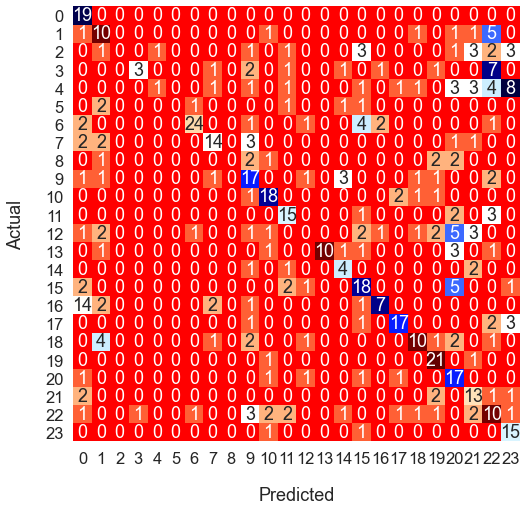

In [95]:
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.5)

ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)

ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

Accuracy = 0.5291750503018109


d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
d:\python38\lib\site-packages\sklearn\metrics\_classification.py:1523: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


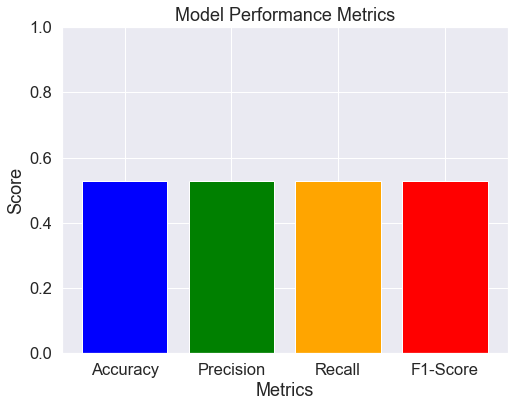

In [96]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy = {accuracy}")
precision = precision_score(y_test, prediction, pos_label='positive',average='micro')
recall = recall_score(y_test, prediction, pos_label='positive',average='micro')
f1 = f1_score(y_test, prediction, pos_label='positive',average='micro')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set y-axis range between 0 and 1
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()